In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [51]:
##데이터 불러오기
df = pd.read_csv("C:/Users/theil/Desktop/data/1등_쓰레기봉투.csv", encoding='UTF8', parse_dates = ['납품요구접수일자'])
df.set_index(df['납품요구접수일자'], inplace=True)
df.pop('납품요구접수일자')


납품요구접수일자
2017-01-02   2017-01-02
2017-01-03   2017-01-03
2017-01-04   2017-01-04
2017-01-05   2017-01-05
2017-01-06   2017-01-06
                ...    
2021-12-23   2021-12-23
2021-12-24   2021-12-24
2021-12-27   2021-12-27
2021-12-28   2021-12-28
2021-12-31   2021-12-31
Name: 납품요구접수일자, Length: 1290, dtype: datetime64[ns]

In [30]:
##df.index = pd.DatetimeIndex(df.index).to_period('D')

In [38]:
##Auto-ARIMA 라이브러리 import
from pmdarima.arima import auto_arima


In [52]:
##AutoARIMA 수요예측 모델
data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['증감납품요구수량']
validation = valid['증감납품요구수량']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, 
                   trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=303)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=34029.565, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=33573.021, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=33776.404, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=33452.242, Time=1.23 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.13 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=33623.899, Time=0.96 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=33337.516, Time=1.60 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=33453.943, Time=0.50 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.06 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=33254.027, Time=2.06 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AI

In [53]:
forecast

,Prediction
납품요구접수일자,
2020-11-18,4.822867e+06
2020-11-19,4.559788e+06
2020-11-20,8.227498e+06
2020-11-23,3.489916e+06
2020-11-24,5.323442e+06
...,...
2021-12-23,-8.572601e+05
2021-12-24,-2.695826e+06
2021-12-27,-1.587059e+06


7011255.441515099


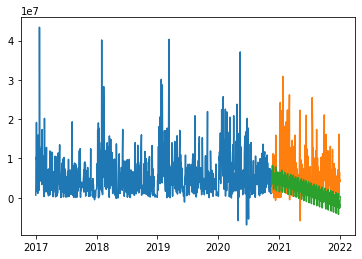

In [54]:
##정확도 계산
rms=np.sqrt(np.mean(np.power((np.array(valid['증감납품요구수량'])-np.array(forecast['Prediction'])),2)))
print(rms)

#plot
plt.plot(train['증감납품요구수량'])
plt.plot(valid['증감납품요구수량'])
plt.plot(forecast['Prediction'])